In [1]:
import sys
sys.path.insert(0, '../')
from bibliotecas import base_estudantes, job, magalu, alunos, petrobras, sns, np, pd, plt, yf, px, go, sp, wn, quandl, date, db, geobr, gpd, os
wn.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./dados.csv', sep=';') #http://comexstat.mdic.gov.br/pt/home

In [3]:
df

,Ano,UF do Produto,Codigo SH2,Descrição SH2,Valor FOB (US$),Quilograma Líquido
0,2022,Rio de Janeiro,27,"Combustíveis minerais, óleos minerais e produt...",15897695648,24680218065
1,2022,Mato Grosso,12,"Sementes e frutos oleaginosos; grãos, sementes...",11523334576,20128148797
2,2022,Pará,26,"Minerios, escórias e cinzas",7087616732,71546686852
3,2022,Minas Gerais,26,"Minerios, escórias e cinzas",6726245081,69826536923
4,2022,São Paulo,27,"Combustíveis minerais, óleos minerais e produt...",4945517507,6868575187
...,...,...,...,...,...,...
45732,1997,Maranhão,96,Obras diversas,11,0
45733,1997,Santa Catarina,37,Produtos para fotografia e cinematografia,9,49
45734,1997,Santa Catarina,45,Cortiça e suas obras,9,30
45735,1997,Ceará,81,Outros metais comuns; ceramais (cermets); obra...,9,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45737 entries, 0 to 45736
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Ano                 45737 non-null  int64 
 1   UF do Produto       45737 non-null  object
 2   Codigo SH2          45737 non-null  int64 
 3   Descrição SH2       45737 non-null  object
 4   Valor FOB (US$)     45737 non-null  int64 
 5   Quilograma Líquido  45737 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.1+ MB


In [5]:
df.rename(columns={'UF do Produto':'UF', 'Codigo SH2':'Codigo', 'Descrição SH2':'Descricao', 'Valor FOB (US$)':'FOB', 'Quilograma Líquido':'Kg'}, inplace=True)

In [6]:
df

,Ano,UF,Codigo,Descricao,FOB,Kg
0,2022,Rio de Janeiro,27,"Combustíveis minerais, óleos minerais e produt...",15897695648,24680218065
1,2022,Mato Grosso,12,"Sementes e frutos oleaginosos; grãos, sementes...",11523334576,20128148797
2,2022,Pará,26,"Minerios, escórias e cinzas",7087616732,71546686852
3,2022,Minas Gerais,26,"Minerios, escórias e cinzas",6726245081,69826536923
4,2022,São Paulo,27,"Combustíveis minerais, óleos minerais e produt...",4945517507,6868575187
...,...,...,...,...,...,...
45732,1997,Maranhão,96,Obras diversas,11,0
45733,1997,Santa Catarina,37,Produtos para fotografia e cinematografia,9,49
45734,1997,Santa Catarina,45,Cortiça e suas obras,9,30
45735,1997,Ceará,81,Outros metais comuns; ceramais (cermets); obra...,9,1


In [7]:
df['Descricao'] = df['Descricao'].astype(str)
df['UF'] = df['UF'].astype(str)

In [8]:
df.duplicated().sum()

0

In [9]:
sorted(df['UF'].unique())

['Acre',
 'Alagoas',
 'Amapá',
 'Amazonas',
 'Bahia',
 'Ceará',
 'Consumo de Bordo',
 'Distrito Federal',
 'Espírito Santo',
 'Goiás',
 'Maranhão',
 'Mato Grosso',
 'Mato Grosso do Sul',
 'Mercadoria Nacionalizada',
 'Minas Gerais',
 'Não Declarada',
 'Paraná',
 'Paraíba',
 'Pará',
 'Pernambuco',
 'Piauí',
 'Reexportação',
 'Rio Grande do Norte',
 'Rio Grande do Sul',
 'Rio de Janeiro',
 'Rondônia',
 'Roraima',
 'Santa Catarina',
 'Sergipe',
 'São Paulo',
 'Tocantins',
 'Zona Não Declarada']

In [10]:
cod_uf = {
 'Acre':'AC',
 'Alagoas':'AL',
 'Amapá':'AP',
 'Amazonas':'AM',
 'Bahia':'BA',
 'Ceará':'CE',
 'Distrito Federal':'DF',
 'Espírito Santo':'ES',
 'Goiás':'GO',
 'Maranhão':'MA',
 'Mato Grosso':'MT',
 'Mato Grosso do Sul':'MS',
 'Minas Gerais':'MG',
 'Paraná':'PR',
 'Paraíba':'PB',
 'Pará':'PA',
 'Pernambuco':'PE',
 'Piauí':'PI',
 'Rio Grande do Norte':'RN',
 'Rio Grande do Sul':'RS',
 'Rio de Janeiro':'RJ',
 'Rondônia':'RO',
 'Roraima':'RR',
 'Santa Catarina':'SC',
 'Sergipe':'SE',
 'São Paulo':'SP',
 'Tocantins':'TO'
}

In [11]:
df['Cod_UF']=df.UF.map(cod_uf)

In [12]:
df

,Ano,UF,Codigo,Descricao,FOB,Kg,Cod_UF
0,2022,Rio de Janeiro,27,"Combustíveis minerais, óleos minerais e produt...",15897695648,24680218065,RJ
1,2022,Mato Grosso,12,"Sementes e frutos oleaginosos; grãos, sementes...",11523334576,20128148797,MT
2,2022,Pará,26,"Minerios, escórias e cinzas",7087616732,71546686852,PA
3,2022,Minas Gerais,26,"Minerios, escórias e cinzas",6726245081,69826536923,MG
4,2022,São Paulo,27,"Combustíveis minerais, óleos minerais e produt...",4945517507,6868575187,SP
...,...,...,...,...,...,...,...
45732,1997,Maranhão,96,Obras diversas,11,0,MA
45733,1997,Santa Catarina,37,Produtos para fotografia e cinematografia,9,49,SC
45734,1997,Santa Catarina,45,Cortiça e suas obras,9,30,SC
45735,1997,Ceará,81,Outros metais comuns; ceramais (cermets); obra...,9,1,CE


In [13]:
exp_imp = db.fetch_series(['FAO/TP/10.21.5922', 'FAO/TP/10.21.5622'])

In [14]:
exp_imp

,@frequency,provider_code,dataset_code,dataset_name,series_code,series_name,original_period,period,original_value,value,item,area,element,Item,Area,Element
0,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1961,1961-01-01,1402970.0,1402970.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value
1,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1962,1962-01-01,1214185.0,1214185.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value
2,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1963,1963-01-01,1406480.0,1406480.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value
3,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1964,1964-01-01,1429790.0,1429790.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value
4,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1965,1965-01-01,1595479.0,1595479.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,annual,FAO,TP,Trade: Crops and livestock products,10.21.5622,Total Merchandise Trade – Brazil – Import Value,2015,2015-01-01,178832000.0,178832000.0,10,21,5622,Total Merchandise Trade,Brazil,Import Value
55,annual,FAO,TP,Trade: Crops and livestock products,10.21.5622,Total Merchandise Trade – Brazil – Import Value,2016,2016-01-01,143411000.0,143411000.0,10,21,5622,Total Merchandise Trade,Brazil,Import Value
56,annual,FAO,TP,Trade: Crops and livestock products,10.21.5622,Total Merchandise Trade – Brazil – Import Value,2017,2017-01-01,157543000.0,157543000.0,10,21,5622,Total Merchandise Trade,Brazil,Import Value
57,annual,FAO,TP,Trade: Crops and livestock products,10.21.5622,Total Merchandise Trade – Brazil – Import Value,2018,2018-01-01,188563933.0,188563933.0,10,21,5622,Total Merchandise Trade,Brazil,Import Value


In [15]:
exp_imp['period'].duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
54     True
55     True
56     True
57     True
58     True
Name: period, Length: 118, dtype: bool

In [16]:
exp_imp.set_index('period', inplace=True)

Element
Export Value    AxesSubplot(0.125,0.125;0.775x0.755)
Import Value    AxesSubplot(0.125,0.125;0.775x0.755)
Name: value, dtype: object

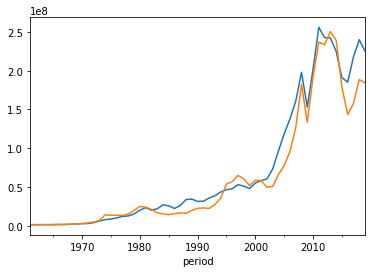

In [17]:
exp_imp.groupby('Element')['value'].plot()

In [18]:
exp_imp

,@frequency,provider_code,dataset_code,dataset_name,series_code,series_name,original_period,original_value,value,item,area,element,Item,Area,Element
period,,,,,,,,,,,,,,,
1961-01-01,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1961,1402970.0,1402970.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value
1962-01-01,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1962,1214185.0,1214185.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value
1963-01-01,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1963,1406480.0,1406480.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value
1964-01-01,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1964,1429790.0,1429790.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value
1965-01-01,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1965,1595479.0,1595479.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-01,annual,FAO,TP,Trade: Crops and livestock products,10.21.5622,Total Merchandise Trade – Brazil – Import Value,2015,178832000.0,178832000.0,10,21,5622,Total Merchandise Trade,Brazil,Import Value
2016-01-01,annual,FAO,TP,Trade: Crops and livestock products,10.21.5622,Total Merchandise Trade – Brazil – Import Value,2016,143411000.0,143411000.0,10,21,5622,Total Merchandise Trade,Brazil,Import Value
2017-01-01,annual,FAO,TP,Trade: Crops and livestock products,10.21.5622,Total Merchandise Trade – Brazil – Import Value,2017,157543000.0,157543000.0,10,21,5622,Total Merchandise Trade,Brazil,Import Value


In [19]:
exp_imp['original_period'] = pd.to_datetime(exp_imp['original_period'])

<AxesSubplot:xlabel='original_period', ylabel='value'>

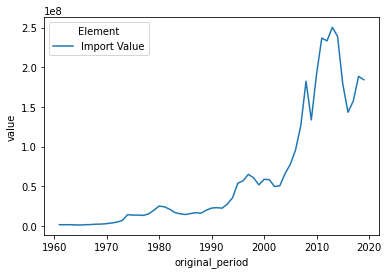

In [20]:
p = exp_imp.query('Element == "Import Value"')
# p
sns.lineplot(data=p,x='original_period', y='value', hue='Element')

<AxesSubplot:xlabel='original_period', ylabel='value'>

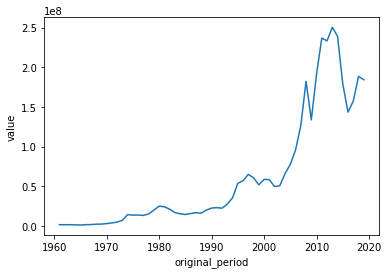

In [21]:
sns.lineplot(x=p['original_period'], y=p['value'])

In [22]:
exp_imp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 1961-01-01 to 2019-01-01
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   @frequency       118 non-null    object        
 1   provider_code    118 non-null    object        
 2   dataset_code     118 non-null    object        
 3   dataset_name     118 non-null    object        
 4   series_code      118 non-null    object        
 5   series_name      118 non-null    object        
 6   original_period  118 non-null    datetime64[ns]
 7   original_value   118 non-null    float64       
 8   value            118 non-null    float64       
 9   item             118 non-null    object        
 10  area             118 non-null    object        
 11  element          118 non-null    object        
 12  Item             118 non-null    object        
 13  Area             118 non-null    object        
 14  Element          118 no

In [23]:
importa = exp_imp.query('Element == "Import Value"')['value']
exporta = exp_imp.query('Element == "Export Value"')['value']
saldo = exporta - importa

In [24]:
valores = pd.concat([importa, exporta, saldo], axis=1)

In [25]:
valores

,value,value,value
period,,,
1961-01-01,1460093.0,1402970.0,-57123.0
1962-01-01,1475047.0,1214185.0,-260862.0
1963-01-01,1486848.0,1406480.0,-80368.0
1964-01-01,1263451.0,1429790.0,166339.0
1965-01-01,1096423.0,1595479.0,499056.0
1966-01-01,1496215.0,1741442.0,245227.0
1967-01-01,1667429.0,1653751.0,-13678.0
1968-01-01,2131859.0,1881344.0,-250515.0
1969-01-01,2264656.0,2311169.0,46513.0


In [26]:
valores.columns = ['Exp', 'Imp', 'Saldo']
valores.index.name = 'Ano'

In [27]:
valores

,Exp,Imp,Saldo
Ano,,,
1961-01-01,1460093.0,1402970.0,-57123.0
1962-01-01,1475047.0,1214185.0,-260862.0
1963-01-01,1486848.0,1406480.0,-80368.0
1964-01-01,1263451.0,1429790.0,166339.0
1965-01-01,1096423.0,1595479.0,499056.0
1966-01-01,1496215.0,1741442.0,245227.0
1967-01-01,1667429.0,1653751.0,-13678.0
1968-01-01,2131859.0,1881344.0,-250515.0
1969-01-01,2264656.0,2311169.0,46513.0


<AxesSubplot:xlabel='Ano'>

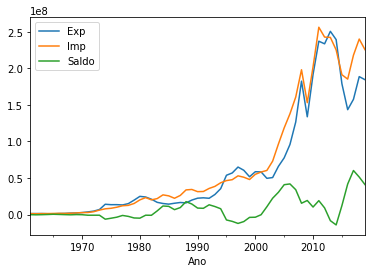

In [28]:
valores.plot()

In [29]:
exp_imp

,@frequency,provider_code,dataset_code,dataset_name,series_code,series_name,original_period,original_value,value,item,area,element,Item,Area,Element
period,,,,,,,,,,,,,,,
1961-01-01,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1961-01-01,1402970.0,1402970.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value
1962-01-01,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1962-01-01,1214185.0,1214185.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value
1963-01-01,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1963-01-01,1406480.0,1406480.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value
1964-01-01,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1964-01-01,1429790.0,1429790.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value
1965-01-01,annual,FAO,TP,Trade: Crops and livestock products,10.21.5922,Total Merchandise Trade – Brazil – Export Value,1965-01-01,1595479.0,1595479.0,10,21,5922,Total Merchandise Trade,Brazil,Export Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-01,annual,FAO,TP,Trade: Crops and livestock products,10.21.5622,Total Merchandise Trade – Brazil – Import Value,2015-01-01,178832000.0,178832000.0,10,21,5622,Total Merchandise Trade,Brazil,Import Value
2016-01-01,annual,FAO,TP,Trade: Crops and livestock products,10.21.5622,Total Merchandise Trade – Brazil – Import Value,2016-01-01,143411000.0,143411000.0,10,21,5622,Total Merchandise Trade,Brazil,Import Value
2017-01-01,annual,FAO,TP,Trade: Crops and livestock products,10.21.5622,Total Merchandise Trade – Brazil – Import Value,2017-01-01,157543000.0,157543000.0,10,21,5622,Total Merchandise Trade,Brazil,Import Value


<AxesSubplot:xlabel='Ano'>

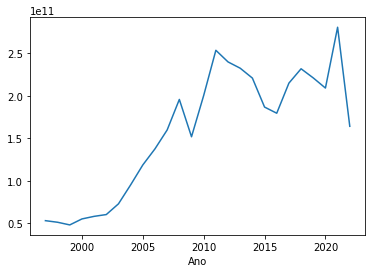

In [30]:
df.groupby('Ano')['FOB'].sum().plot()

In [33]:
df.to_csv("novo.csv", index_label=False)